#Machine Learning: Clustering and Analysis

##Import modules and data

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 42.9 MB/s eta 0:00:00


In [2]:
!pip install pygifsicle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pygifsicle: filename=pygifsicle-1.0.7-py3-none-any.whl size=4110 sha256=8861f1c479656de3bfdbea27c9813bd029f828eda85778e725573b362dae23cf
  Stored in directory: /root/.cache/pip/wheels/ac/79/bb/9b5e92cd84f1b56e1eb7d1265fa0f4d5a13f3e4debb4c0b7f6
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5651 sha256=24fa377d84e68260f94d6dc509e2cff41b404a3292a10112bfde16035c601e9e
  Stored in directory: /root/.cache/pip/wheels/7c/a1/b1/9662c79502c353ff7e71c36f84846acd623cbcbe3f7255f5d5
Successfully built pygifsicle support_developer


In [3]:
!sudo apt-get install gifsicle

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  gifsicle
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 135 kB of archives.
After this operation, 401 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 gifsicle amd64 1.92-2 [135 kB]
Fetched 135 kB in 1s (174 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package gifsicle.
(Reading database ... 128276 files and directories currently 

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.colors as mcolors
import random
import os
from os import path
import imageio
from pygifsicle import optimize

Creates folders in collab

In [5]:
if path.exists('/content/clustering/') == False:
  os.mkdir('/content/clustering/')

os.chdir('/content/clustering/')
!pwd
!ls

if path.exists('/content/clustering/image') == False:
  os.mkdir('/content/clustering/image')

os.chdir('/content/clustering/image')
!pwd
!ls

if path.exists('/content/clustering/stills') == False:
  os.mkdir('/content/clustering/stills')

os.chdir('/content/clustering/stills')
!pwd
!ls

if path.exists('/content/clustering/gifs') == False:
  os.mkdir('/content/clustering/gifs')

os.chdir('/content/clustering/gifs')
!pwd
!ls

if path.exists('/content/final') == False:
  os.mkdir('/content/final')

os.chdir('/content/final')
!pwd
!ls

if path.exists('/content/final/stills') == False:
  os.mkdir('/content/final/stills')

os.chdir('/content/final/stills')
!pwd
!ls

if path.exists('/content/final/gifs') == False:
  os.mkdir('/content/final/gifs')

os.chdir('/content/final/gifs')
!pwd
!ls

/content/clustering
/content/clustering/image
/content/clustering/stills
/content/clustering/gifs
/content/final
/content/final/stills
/content/final/gifs


Unzip shape file from drive

In [6]:
os.chdir('/content/')
!pwd
!ls
!unzip "/content/drive/MyDrive/DataSci112/Final Project Data/ukr_admbnda_sspe_20230201_shp.zip"

/content
clustering  drive  final  sample_data
Archive:  /content/drive/MyDrive/DataSci112/Final Project Data/ukr_admbnda_sspe_20230201_shp.zip
 extracting: ukr_admbnda_sspe_20230201_SHP/Shapefiles.zip  
 extracting: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.cpg  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.dbf  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.prj  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.sbn  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.sbx  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.shp  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.shp.xml  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm0_sspe_20230201.shx  
 extracting: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.cpg  
  inflating: ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_2023020

In [7]:
df_region = pd.DataFrame (data= {"region": ["Crimea","Cherkasy","Chernihiv","Chernivtsi","Dnipropetrovsk","Donetsk","IvanoFrankivsk","Kharkiv","Kherson","Khmelnytskyi","Kirovohrad","Kyiv","Luhansk","Lviv","Sevastopol","Mykolaiv","Odesa","Poltava","Rivne","Sumy","Ternopil","Vinnytsia","Volyn","Zakarpattia","Zaporizhzhia","Zhytomyr"],
                                 "city": ["Simferopol","Cherkasy","Chernihiv","Chernivtsi","Dnipro","Donetsk","IvanoFrankivsk","Kharkiv","Kherson","Khmelnytskyi","Kropyvnytskyi","Kyiv","Luhansk","Lviv","Sevastopol","Mykolaiv","Odesa","Poltava","Rivne","Sumy","Ternopil","Vinnytsia","Lutsk","Uzhhorod","Zaporizhzhia","Zhytomyr"]} )

Read in pickle from cleaning

In [8]:
df_data = pd.read_pickle("/content/drive/MyDrive/DataSci112/Final Project Data/112_Project_DataV2.0.pkl")

In [9]:
df_data

,date,city,region,lat,lng,content
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall
...,...,...,...,...,...,...
8789,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...
8790,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama..."
8791,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama..."
8792,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...


Create new colum days_since which calculates days since the invasions began

In [10]:
df_data["days_since"] = df_data["date"] - pd.to_datetime("2022-02-20")
df_data["days_since"] = df_data["days_since"].dt.days

In [11]:
df_data

,date,city,region,lat,lng,content,days_since
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,10
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,11
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,10
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,11
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,10
...,...,...,...,...,...,...,...
8789,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,360
8790,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360
8791,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360
8792,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,360


Create a dataframe of mappable points (incidents with valid cords) and calculate the frequency of entries each day to create the correct marker size

In [12]:
df_mapping = df_data[pd.notna(df_data["lat"])]

In [13]:
df_mapping_frequency = pd.DataFrame(df_mapping[["lat", "lng", "days_since"]].value_counts()).reset_index()
df_mapping_frequency.columns = ["lat", "lng", "days_since", "count"]
df_mapping_frequency

,lat,lng,days_since,count
0,50.4500,30.5236,232,60
1,50.4500,30.5236,23,29
2,47.8378,35.1383,231,22
3,48.4500,34.9833,232,22
4,46.4775,30.7326,62,22
...,...,...,...,...
3888,48.3264,28.3956,66,1
3889,48.3264,28.3956,73,1
3890,48.3264,28.3956,99,1
3891,48.3264,28.3956,225,1


In [14]:
df_mapping = df_mapping.merge(df_mapping_frequency, on=["lat", "lng", "days_since"], how="left")
df_mapping

,date,city,region,lat,lng,content,days_since,count
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,10,10
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,11,8
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,10,1
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,11,8
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,10,10
...,...,...,...,...,...,...,...,...
8589,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,360,2
8590,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3
8591,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3
8592,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,360,4


Load in geopandas and creat gdf

In [15]:
gdf_Ukraine = gpd.read_file("/content/ukr_admbnda_sspe_20230201_SHP/ukr_admbnda_adm1_sspe_20230201.shp")

In [16]:
gdf_mapping = gpd.GeoDataFrame(
df_mapping,
geometry=gpd.points_from_xy(df_mapping["lng"],
df_mapping["lat"])
).set_crs(gdf_Ukraine.crs)
gdf_mapping

,date,city,region,lat,lng,content,days_since,count,geometry
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,10,10,POINT (36.22920 50.00000)
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,11,8,POINT (30.52360 50.45000)
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,10,1,POINT (38.48790 48.94820)
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,11,8,POINT (30.52360 50.45000)
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,10,10,POINT (36.22920 50.00000)
...,...,...,...,...,...,...,...,...,...
8589,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,360,2,POINT (37.80420 48.00890)
8590,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3,POINT (36.22920 50.00000)
8591,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3,POINT (36.22920 50.00000)
8592,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,360,4,POINT (37.18330 48.28330)


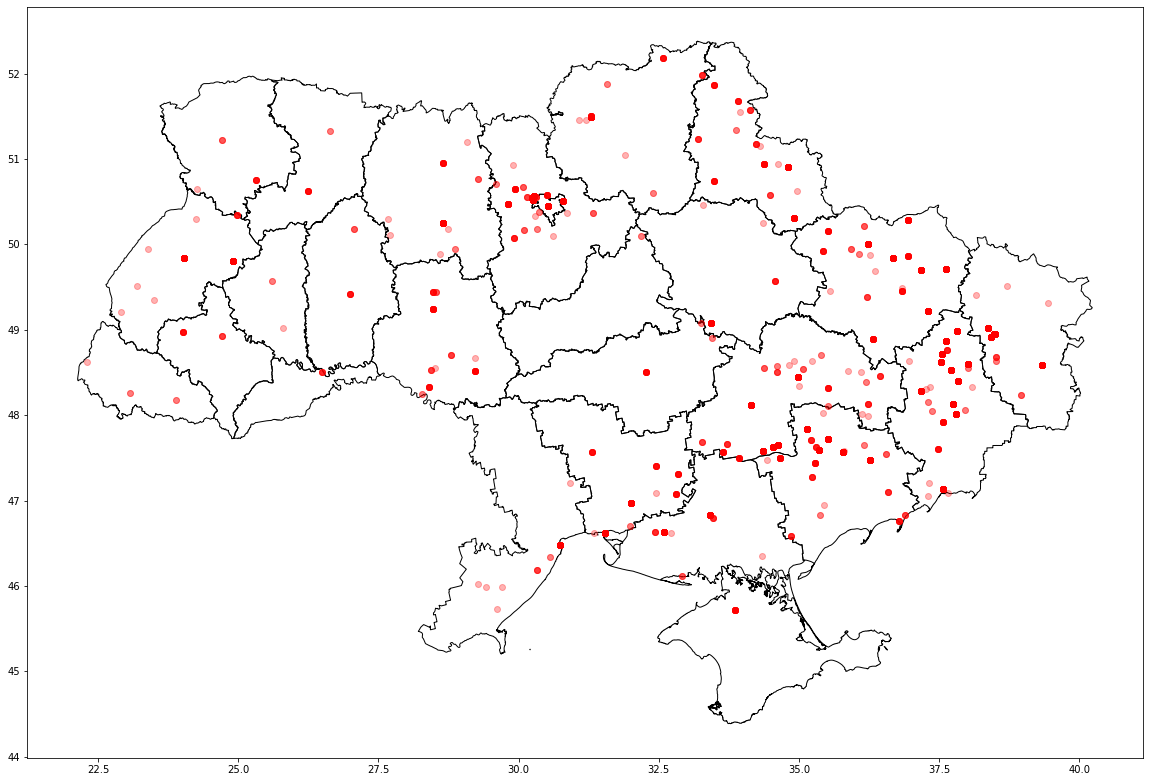

In [17]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
gdf_mapping.plot(
ax=ax, color="red", alpha=0.3)
ax.set_facecolor('white')


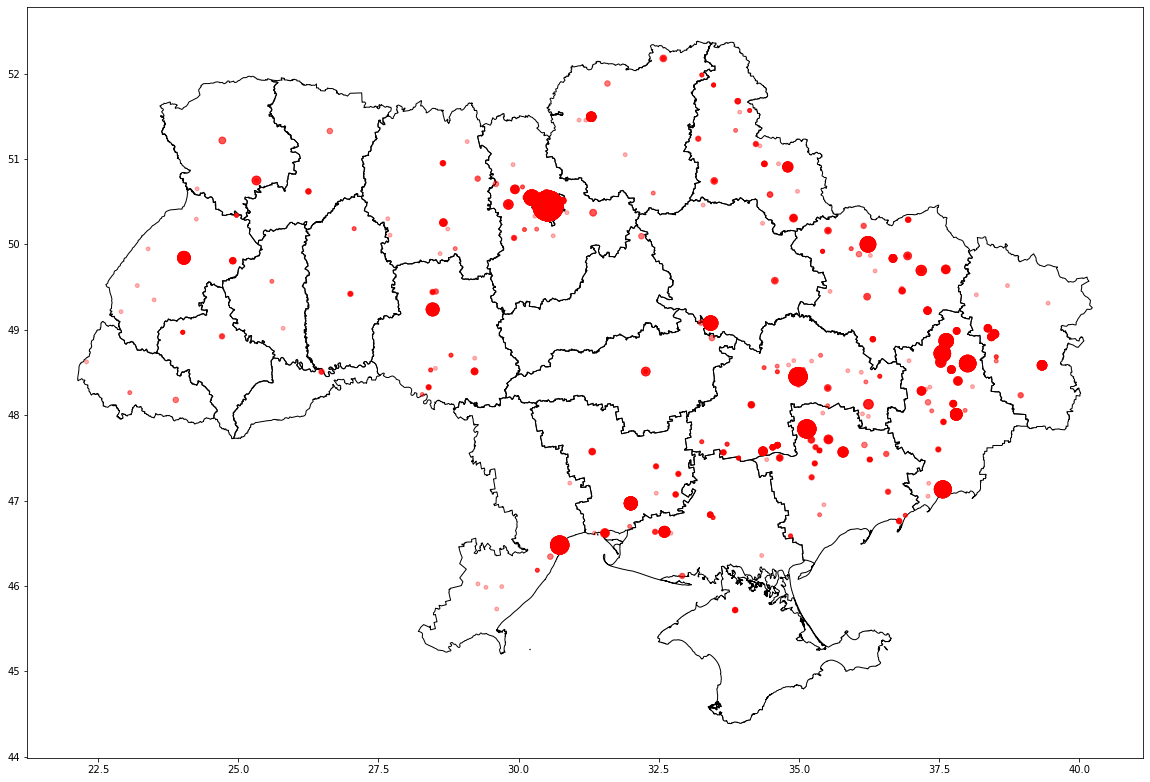

In [18]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
gdf_mapping.plot(
ax=ax, color="red", alpha=0.3, markersize= (gdf_mapping["count"] * 15))
ax.set_facecolor('white')

##Clustering and Evaluation for time and space

In [19]:
#Kmeans Clustering
num_clusters = 32
model = KMeans(n_clusters=num_clusters)
pipeline = make_pipeline(
    StandardScaler(),
    model
)
pipeline.fit(df_mapping[["lat", "lng", "days_since"]])
centroids = model.cluster_centers_.astype("int")
clusters = model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
df_clusters = pd.DataFrame(clusters, columns=['k_cluster'])
df_mapping = df_mapping.merge(df_clusters, left_index=True, right_index= True)

In [21]:
#Agglormative Clustering-single linkage
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="single")
pipeline = make_pipeline(
    StandardScaler(),
    model
)
pipeline.fit(df_mapping[["lat", "lng", "days_since"]])
clusters = model.labels_
df_clusters = pd.DataFrame(clusters, columns=['AgC_single_cluster'])
df_mapping = df_mapping.merge(df_clusters, left_index=True, right_index= True)

In [22]:
#Agglormative Clustering-complete linkage
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="complete")
pipeline = make_pipeline(
    StandardScaler(),
    model
)
pipeline.fit(df_mapping[["lat", "lng", "days_since"]])
clusters = model.labels_
df_clusters = pd.DataFrame(clusters, columns=['AgC_complete_cluster'])
df_mapping = df_mapping.merge(df_clusters, left_index=True, right_index= True)

In [23]:
#Agglormative Clustering-average linkage
model = AgglomerativeClustering(n_clusters=num_clusters, linkage="average")
pipeline = make_pipeline(
    StandardScaler(),
    model
)
pipeline.fit(df_mapping[["lat", "lng", "days_since"]])
clusters = model.labels_
df_clusters = pd.DataFrame(clusters, columns=['AgC_average_cluster'])
df_mapping = df_mapping.merge(df_clusters, left_index=True, right_index= True)

In [24]:
df_mapping

,date,city,region,lat,lng,content,days_since,count,geometry,k_cluster,AgC_single_cluster,AgC_complete_cluster,AgC_average_cluster
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,10,10,POINT (36.22920 50.00000),15,1,12,14
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,11,8,POINT (30.52360 50.45000),1,0,18,15
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,10,1,POINT (38.48790 48.94820),19,1,1,17
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,11,8,POINT (30.52360 50.45000),1,0,18,15
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,10,10,POINT (36.22920 50.00000),15,1,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,360,2,POINT (37.80420 48.00890),17,1,19,7
8590,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3,POINT (36.22920 50.00000),14,1,3,19
8591,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360,3,POINT (36.22920 50.00000),14,1,3,19
8592,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,360,4,POINT (37.18330 48.28330),17,1,19,7


map colors onto clusters

In [25]:
colors = list(mcolors.CSS4_COLORS.values())
colormap = {}
for i in range(num_clusters):
  colormap[i] = random.sample(colors, 1)[0]

In [26]:
df_mapping["k_color"] = df_mapping["k_cluster"].map(colormap)
df_mapping["k_color"] = df_mapping["k_color"].astype("string")

df_mapping["AgC_single_color"] = df_mapping["AgC_single_cluster"].map(colormap)
df_mapping["AgC_single_color"] = df_mapping["AgC_single_color"].astype("string")

df_mapping["AgC_complete_color"] = df_mapping["AgC_complete_cluster"].map(colormap)
df_mapping["AgC_complete_color"] = df_mapping["AgC_complete_color"].astype("string")

df_mapping["AgC_average_color"] = df_mapping["AgC_average_cluster"].map(colormap)
df_mapping["AgC_average_color"] = df_mapping["AgC_average_color"].astype("string")


In [27]:
df_mapping["k_color"]

0       #F5DEB3
1       #008080
2       #9ACD32
3       #008080
4       #F5DEB3
         ...   
8589    #32CD32
8590    #FFFAF0
8591    #FFFAF0
8592    #32CD32
8593    #32CD32
Name: k_color, Length: 8594, dtype: string

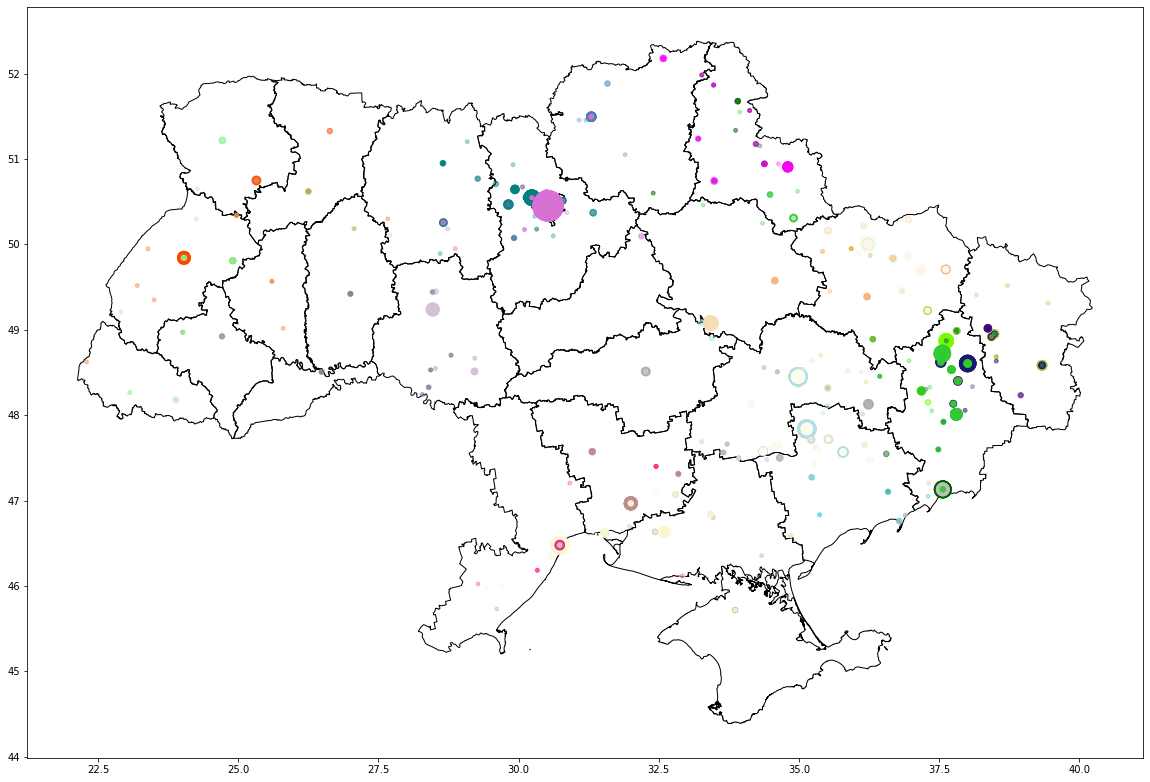

In [28]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
gdf_mapping.plot(
ax=ax, color=df_mapping["k_color"], alpha= 0.3, markersize = (gdf_mapping["count"] * 15))
ax.set_facecolor('white')

Too messy to plot entire years worth at once, to evaluate we will look at a slice of around 100 days

In [29]:
def calculate_alpha_stationary(day, center, range):
  upper = center + range//2
  lower = center - range//2
  if (day >= lower) & (day <= upper):
    return 0.5
  else:
    return 0

In [30]:
alpha = gdf_mapping["days_since"].apply(lambda x: calculate_alpha_stationary(x, 150, 100))

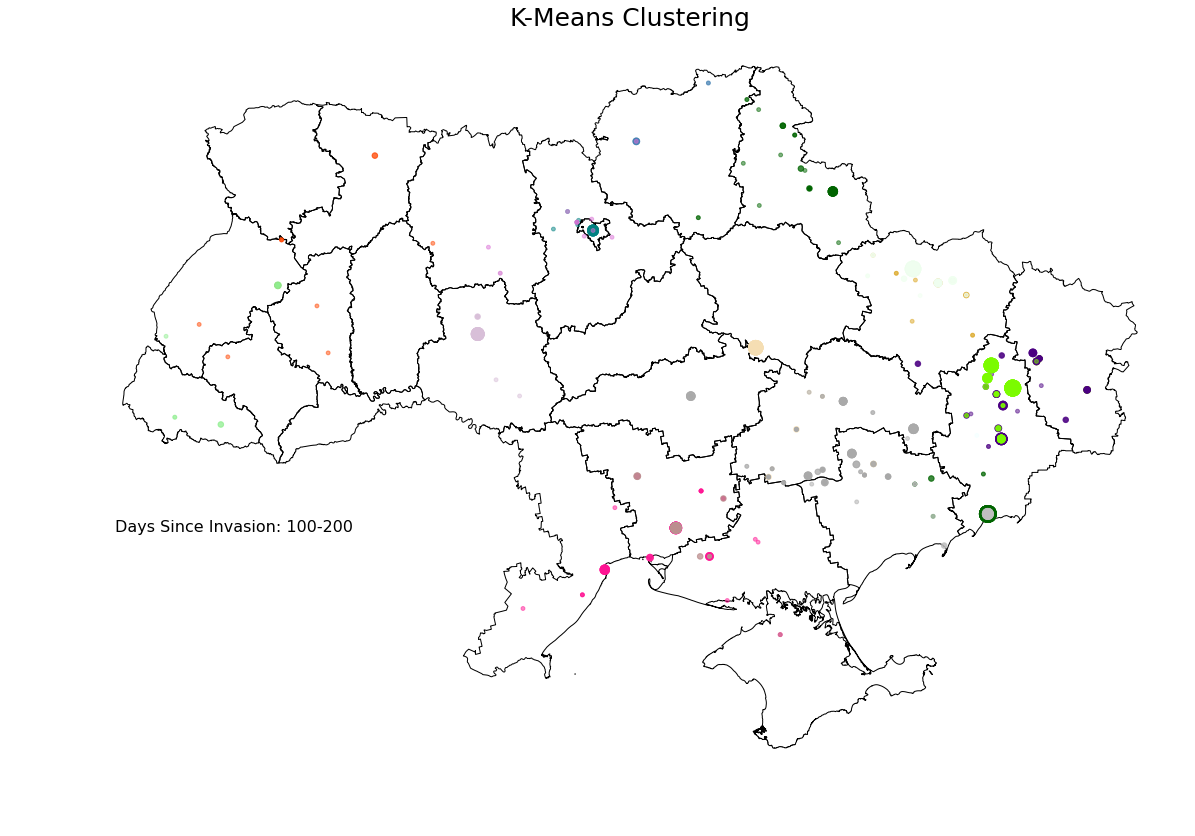

In [31]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["k_color"], alpha= alpha, markersize = (gdf_mapping["count"] * 15))
fig.set_title('K-Means Clustering', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
ax.annotate("Days Since Invasion: 100-200",xy=(0.08, .22), 
          xycoords="figure fraction", horizontalalignment="left", 
          verticalalignment="top", fontsize=16)
chart = fig.get_figure()
chart.savefig("/content/clustering/image/K-Means.png", dpi=300)

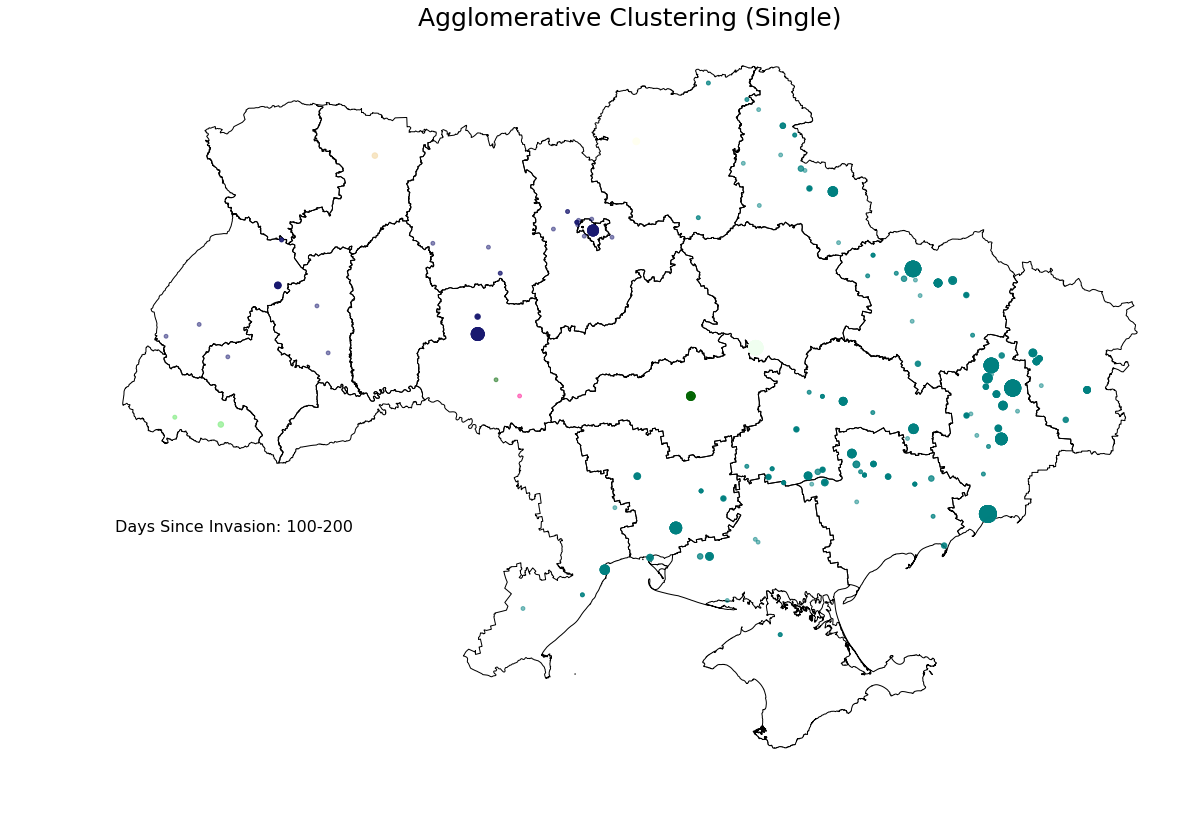

In [32]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["AgC_single_color"], alpha= alpha, markersize = (gdf_mapping["count"] * 15))
fig.set_title('Agglomerative Clustering (Single)', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
ax.annotate("Days Since Invasion: 100-200",xy=(0.08, .22), 
          xycoords="figure fraction", horizontalalignment="left", 
          verticalalignment="top", fontsize=16)
chart = fig.get_figure()
chart.savefig("/content/clustering/image/AgC_single.png", dpi=300)

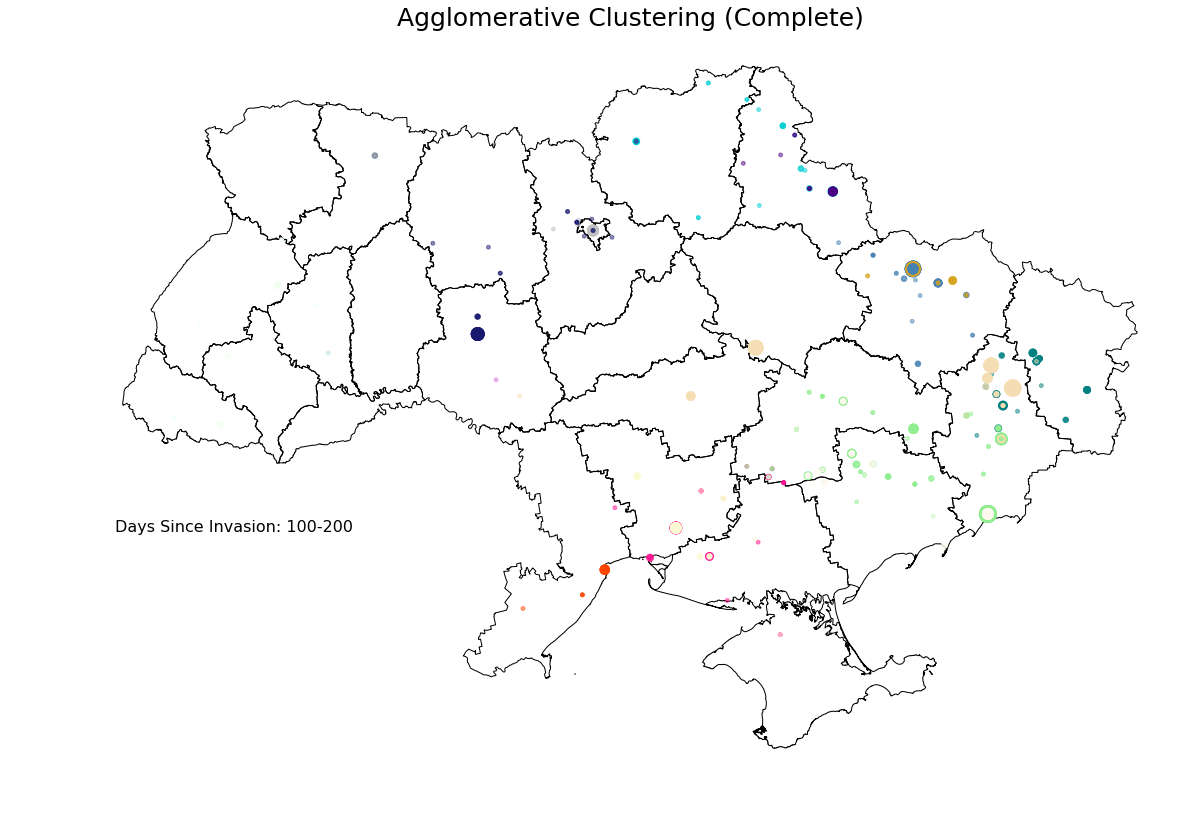

In [33]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["AgC_complete_color"], alpha= alpha, markersize = (gdf_mapping["count"] * 15))
fig.set_title('Agglomerative Clustering (Complete)', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
ax.annotate("Days Since Invasion: 100-200",xy=(0.08, .22), 
          xycoords="figure fraction", horizontalalignment="left", 
          verticalalignment="top", fontsize=16)
chart = fig.get_figure()
chart.savefig("/content/clustering/image/AgC_complete.png", dpi=300)

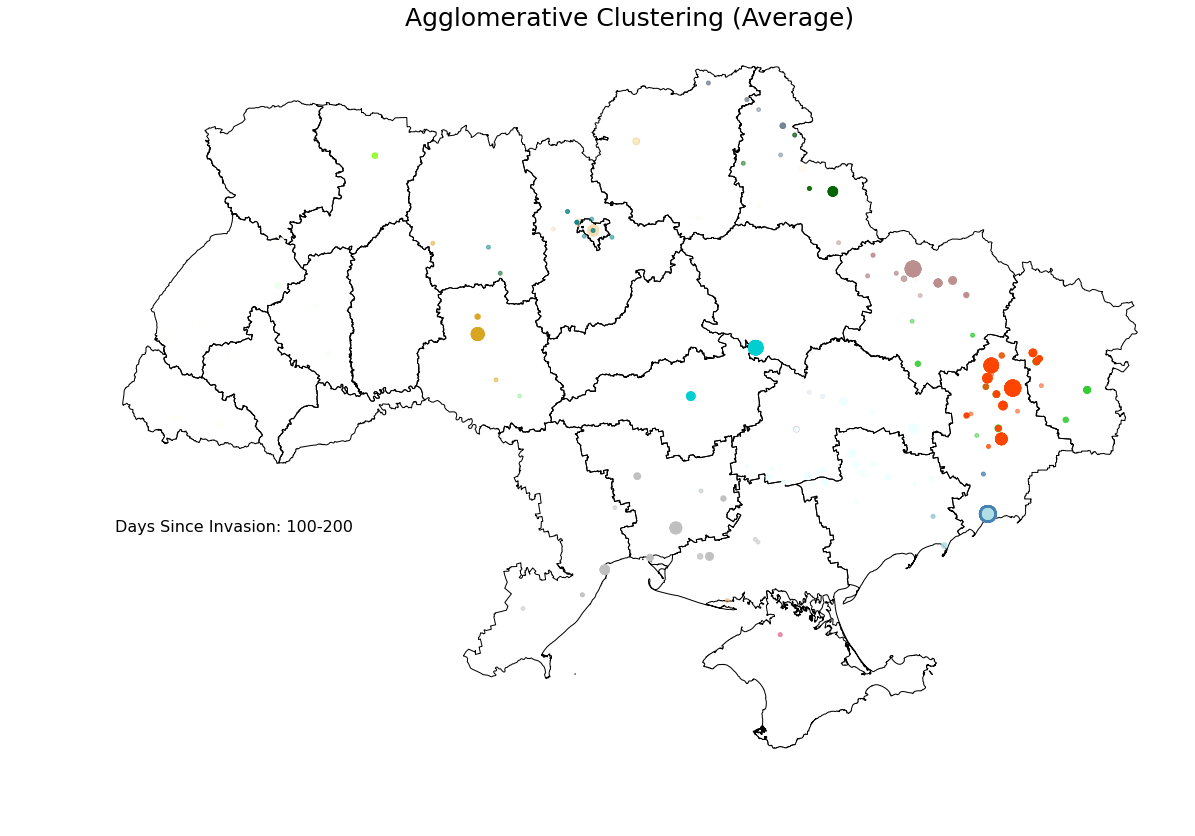

In [34]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["AgC_average_color"], alpha= alpha, markersize = (gdf_mapping["count"] * 15))
fig.set_title('Agglomerative Clustering (Average)', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
ax.annotate("Days Since Invasion: 100-200",xy=(0.08, .22), 
          xycoords="figure fraction", horizontalalignment="left", 
          verticalalignment="top", fontsize=16)
chart = fig.get_figure()
chart.savefig("/content/clustering/image/AgC_average.png", dpi=300)

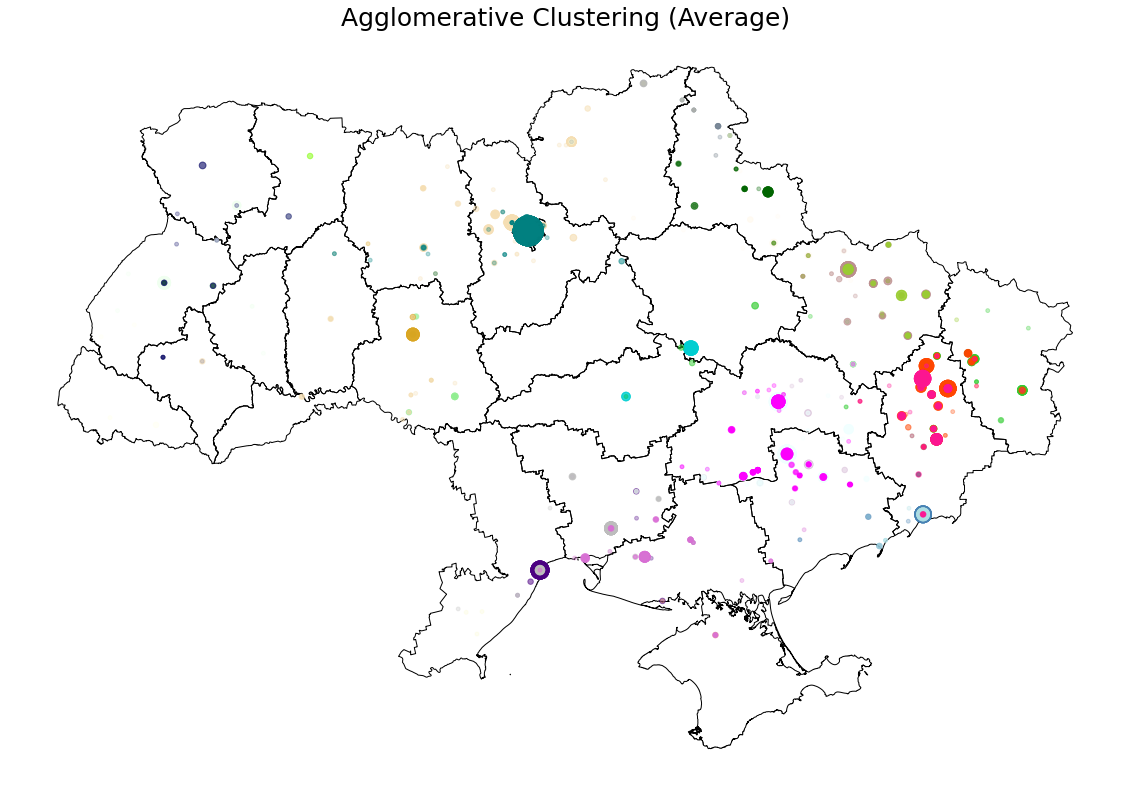

In [35]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["AgC_average_color"], alpha= 0.3, markersize = (gdf_mapping["count"] * 15))
fig.set_title('Agglomerative Clustering (Average)', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
chart = fig.get_figure()
chart.savefig("/content/clustering/image/AgC_average.png", dpi=300)

##Clustering by Text

**These section is incomplete due to time constraints as there wasn't time to optmize the clustering**

Not all of the incidents shown in the data are military attacks, some are evacuations or news, we'd like to cluster the entries to identify this.

In [36]:
df_data

,date,city,region,lat,lng,content,days_since
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,10
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,11
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,10
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,11
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,10
...,...,...,...,...,...,...,...
8789,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,360
8790,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360
8791,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",360
8792,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,360


In [37]:
#Kmeans
num_clusters = 2
model = KMeans(n_clusters=num_clusters)
pipeline = make_pipeline(
    TfidfVectorizer(),
    model
)
pipeline.fit(df_mapping["content"])
centroids = model.cluster_centers_.astype("int")
clusters = model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
df_clusters = pd.DataFrame(clusters, columns=['k_text_cluster'])
df_mapping = df_mapping.merge(df_clusters, left_index=True, right_index= True)

In [39]:
colors = list(mcolors.CSS4_COLORS.values())
colormap = {}
for i in range(num_clusters):
  colormap[i] = random.sample(colors, 1)[0]

In [40]:
df_mapping["k_text_color"] = df_mapping["k_text_cluster"].map(colormap)
df_mapping["k_text_color"] = df_mapping["k_text_color"].astype("string")

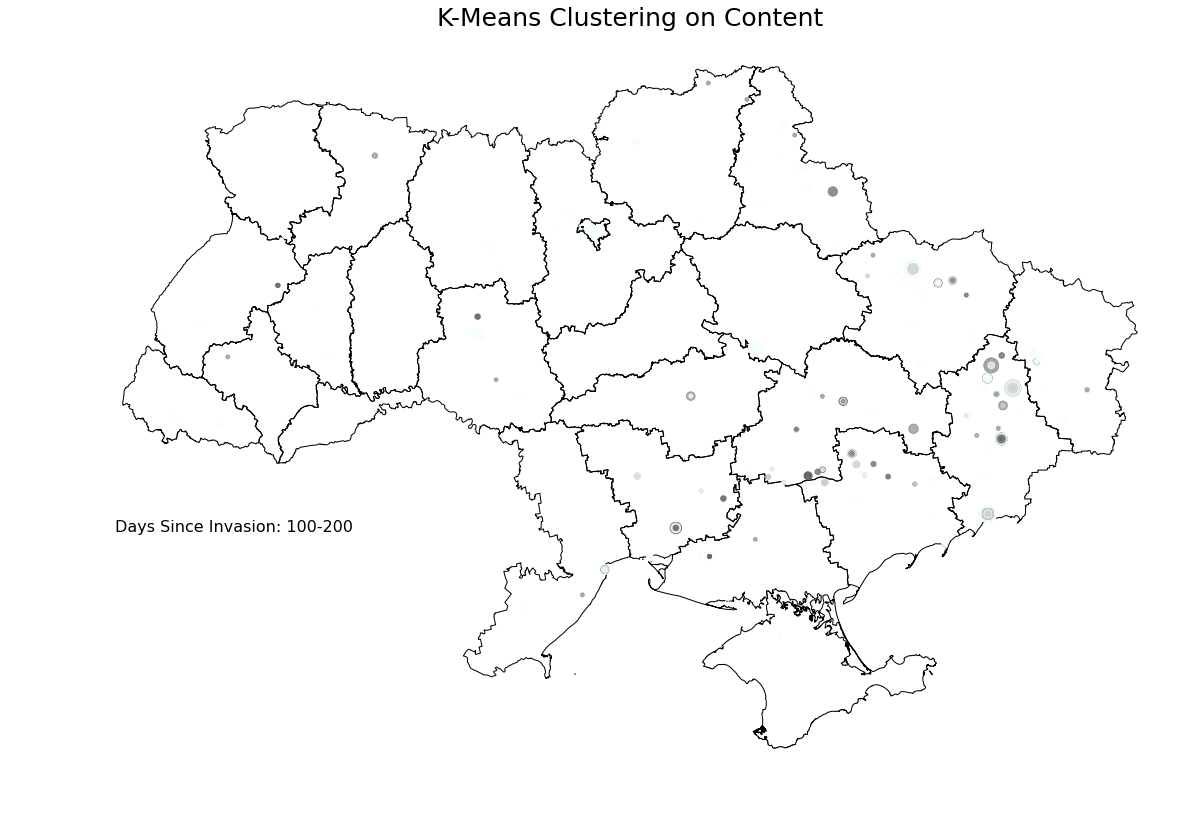

In [41]:
ax = gdf_Ukraine.plot(
facecolor="none", figsize=(20, 20))
fig = gdf_mapping.plot(
ax=ax, color=df_mapping["k_text_color"], alpha= alpha, markersize = (gdf_mapping["count"] * 15))
fig.set_title('K-Means Clustering on Content', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
fig.axis("off")
ax.set_facecolor('white')
ax.annotate("Days Since Invasion: 100-200",xy=(0.08, .22), 
          xycoords="figure fraction", horizontalalignment="left", 
          verticalalignment="top", fontsize=16)
chart = fig.get_figure()
chart.savefig("/content/clustering/image/K-Means_content.png", dpi=300)

Not easy to really tell so let's just look at a slice

In [43]:
df_readable = df_mapping[["content","k_text_cluster"]]

In [45]:
df_readable[df_readable["k_text_cluster"] == 1]

,content,k_text_cluster
121,Mariupol Donetsk Destroyed private buildings,1
322,Dnipropetrovsk region after shelling,1
467,Avdiivka Donetsk region after Shelling coke pl...,1
950,"Luhansk region Severodonetsk, Rubіzhne, Lysych...",1
1218,Volnovakha Donetsk region Destroyed apartment ...,1
...,...,...
8586,"Pokrovsk Donetsk region Apartment building, ca...",1
8587,"Kupiansk Kharkiv region Private houses, househ...",1
8589,Donetsk region Residential high-rise buildings...,1
8590,"Kharkiv region Private houses, households dama...",1


##Code for animated graphs

In [45]:
def calculate_alpha(diff):
  if diff > 0:
    return 0
  alpha = 1 + (0.15 * diff)
  if alpha > 0:
    return alpha
  else:
    return 0

In [46]:
def calculate_marker(count):
  count/20 * 200


In [ ]:
output_path = "/content/clustering/stills/"
days_since = df_mapping["days_since"].sort_values().unique()
markersize = gdf_mapping["count"] * 20
images = []
for day in range(100,200):
  ax = gdf_Ukraine.plot(
  facecolor="none", figsize=(12, 12))
  alpha = (gdf_mapping["days_since"] - day).apply(calculate_alpha)
  fig = gdf_mapping.plot(ax=ax, color=df_mapping["k_color"], alpha= alpha, markersize=markersize)
  fig.axis('off')
  fig.set_title('K-Means Clustering', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})

  ax.annotate("Days Since Invasion: " + str(day),xy=(0.08, .4), 
            xycoords="figure fraction", horizontalalignment="left", 
            verticalalignment="top", fontsize=16)
  matplotlib.pyplot.close()
  filepath = os.path.join(output_path, str(day) +'_Ukraine_K-means.jpg')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)
  images.append(imageio.imread(filepath))

for _ in range(10):
    images.append(imageio.imread(filepath))

imageio.mimwrite('/content/clustering/gifs/Ukriane_K-Means.gif', images)
optimize("/content/clustering/gifs/Ukriane_K-Means.gif", "/content/clustering/gifs/Ukriane_opt_K-Means.gif")

In [ ]:
output_path = "/content/clustering/stills/"
days_since = df_mapping["days_since"].sort_values().unique()
markersize = gdf_mapping["count"] * 20
images = []
for day in range(100,200):
  ax = gdf_Ukraine.plot(
  facecolor="none", figsize=(12, 12))
  alpha = (gdf_mapping["days_since"] - day).apply(calculate_alpha)
  fig = gdf_mapping.plot(ax=ax, color=df_mapping["AgC_single_color"], alpha= alpha, markersize=markersize)
  fig.axis('off')
  fig.set_title('AgC Single', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})

  ax.annotate("Days Since Invasion: " + str(day),xy=(0.08, .4), 
            xycoords="figure fraction", horizontalalignment="left", 
            verticalalignment="top", fontsize=16)
  matplotlib.pyplot.close()
  filepath = os.path.join(output_path, str(day) +'_Ukraine_AgC_single.jpg')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)
  images.append(imageio.imread(filepath))

for _ in range(10):
    images.append(imageio.imread(filepath))

imageio.mimwrite('/content/clustering/gifs/Ukriane_AgC_single.gif', images)
optimize("/content/clustering/gifs/Ukriane_AgC_single.gif", "/content/clustering/gifs/Ukriane_opt_AgC_single.gif")

In [ ]:
output_path = "/content/clustering/stills/"
days_since = df_mapping["days_since"].sort_values().unique()
markersize = gdf_mapping["count"] * 20
images = []
for day in range(100,200):
  ax = gdf_Ukraine.plot(
  facecolor="none", figsize=(12, 12))
  alpha = (gdf_mapping["days_since"] - day).apply(calculate_alpha)
  fig = gdf_mapping.plot(ax=ax, color=df_mapping["AgC_average_color"], alpha= alpha, markersize=markersize)
  fig.axis('off')
  fig.set_title('AgC Average', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})

  ax.annotate("Days Since Invasion: " + str(day),xy=(0.08, .4), 
            xycoords="figure fraction", horizontalalignment="left", 
            verticalalignment="top", fontsize=16)
  matplotlib.pyplot.close()
  filepath = os.path.join(output_path, str(day) +'_Ukraine_AgC_average.jpg')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)
  images.append(imageio.imread(filepath))

for _ in range(10):
    images.append(imageio.imread(filepath))

imageio.mimwrite('/content/clustering/gifs/Ukriane_AgC_average.gif', images)
optimize("/content/clustering/gifs/Ukriane_AgC_average.gif", "/content/clustering/gifs/Ukriane_opt_AgC_average.gif")

###Creating final animation

In [ ]:
# day = 20
# ax = gdf_Ukraine.plot(
# facecolor="none", figsize=(12, 12))
# gdf_mapping.plot(ax=ax, color="red", alpha= alpha, markersize= markersize)
# ax.axis('off')
# ax.set_title('War in Ukraine', \
#               fontdict={'fontsize': '25',
#                          'fontweight' : '3'})
# ax.annotate("Days Since Invasion: " + str(day),xy=(0.08, .22), 
#             xycoords="figure fraction", horizontalalignment="left", 
#             verticalalignment="top", fontsize=16)

In [ ]:
output_path = "/content/final/stills/"
days_since = df_mapping["days_since"].sort_values().unique()
markersize = gdf_mapping["count"] * 20
images = []
for day in days_since:
  ax = gdf_Ukraine.plot(
  facecolor="none", figsize=(12, 12))
  alpha = (gdf_mapping["days_since"] - day).apply(calculate_alpha)
  fig = gdf_mapping.plot(ax=ax, color=df_mapping["k_color"], alpha= alpha, markersize=markersize)
  fig.axis('off')
  fig.set_title('War in Ukraine', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})

  ax.annotate("Days Since Invasion: " + str(day),xy=(0.08, .22), 
            xycoords="figure fraction", horizontalalignment="left", 
            verticalalignment="top", fontsize=16)
  matplotlib.pyplot.close()
  filepath = os.path.join(output_path, str(day) +'_Ukraine.jpg')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)
  images.append(imageio.imread(filepath))

for _ in range(10):
    images.append(imageio.imread(filepath))

imageio.mimwrite('/content/final/gifs/Ukriane.gif', images)
optimize("/content/final/gifs/Ukriane.gif", "/content/final/gifs/Ukriane_opt.gif")
# files.download("/content/final/gifs/Ukriane_opt.gif")